# **A 4-Level Analysis of Consumer Behavior**

In [26]:
from google.colab import files
file = files.upload()

Saving ecommerce dataset.csv to ecommerce dataset (1).csv


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

In [29]:
df = pd.read_csv('ecommerce dataset.csv')
df.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


Data Cleaning

In [30]:
df['Purchase_Amount'] = df['Purchase_Amount'].replace('[\$,]', '', regex=True).astype(float)

# 1. Descriptive Analysis: KMeans Clustering for Customer Segmentation

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Features Selection

In [32]:
features = [
    'Age', 'Purchase_Amount', 'Frequency_of_Purchase',
    'Brand_Loyalty', 'Product_Rating', 'Time_Spent_on_Product_Research(hours)',
    'Return_Rate', 'Customer_Satisfaction', 'Time_to_Decision'
]
X = df[features]

In [33]:
print("Missing values:\n", X.isnull().sum())

Missing values:
 Age                                      0
Purchase_Amount                          0
Frequency_of_Purchase                    0
Brand_Loyalty                            0
Product_Rating                           0
Time_Spent_on_Product_Research(hours)    0
Return_Rate                              0
Customer_Satisfaction                    0
Time_to_Decision                         0
dtype: int64


Feature Standardization

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Elbow Curve

In [35]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

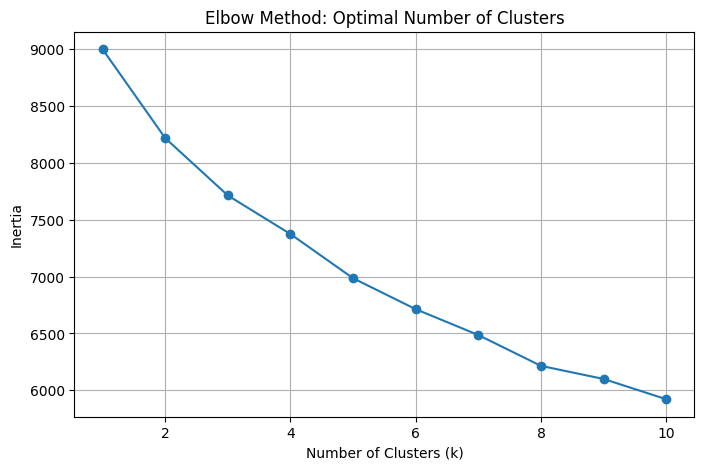

In [36]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method: Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [37]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Customer_Segment'] = kmeans.fit_predict(X_scaled)

Cluster Characteristics

In [38]:
cluster_summary = df.groupby('Customer_Segment')[features].mean().round(2)
print("Cluster Summary:\n")
print(cluster_summary)

Cluster Summary:

                    Age  Purchase_Amount  Frequency_of_Purchase  \
Customer_Segment                                                  
0                 32.76           338.72                   5.05   
1                 33.73           233.87                   9.80   
2                 35.22           213.40                   5.30   
3                 35.51           315.35                   8.19   

                  Brand_Loyalty  Product_Rating  \
Customer_Segment                                  
0                          3.10            3.13   
1                          3.52            2.97   
2                          3.26            3.72   
3                          2.20            2.20   

                  Time_Spent_on_Product_Research(hours)  Return_Rate  \
Customer_Segment                                                       
0                                                  1.12         0.53   
1                                                  1.63 

PCA for 2D Visualization

In [39]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

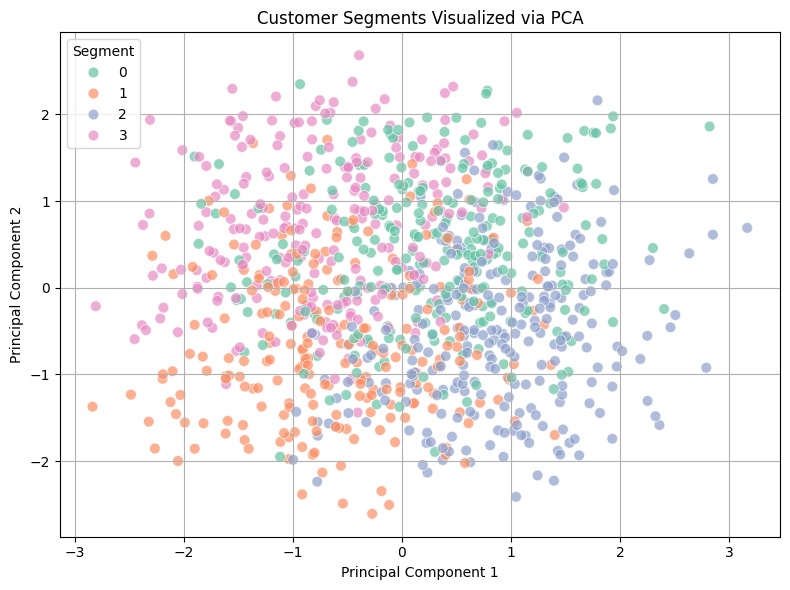

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Customer_Segment',
    data=df,
    palette='Set2',
    s=60, alpha=0.7
)
plt.title("Customer Segments Visualized via PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Segment')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Diagnostic Analysis: Explaining Customer Satisfaction


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
df = df.dropna(subset=['Customer_Satisfaction'])

Features and Target

In [49]:
features = [
    'Age', 'Purchase_Amount', 'Frequency_of_Purchase',
    'Brand_Loyalty', 'Product_Rating', 'Time_Spent_on_Product_Research(hours)',
    'Return_Rate', 'Time_to_Decision'
]
target = 'Customer_Satisfaction'

X = df[features]
y = df[target]

Train-Test Split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

Model Score

In [52]:
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 8.68
R² Score: -0.10


Plot the Decision Tree

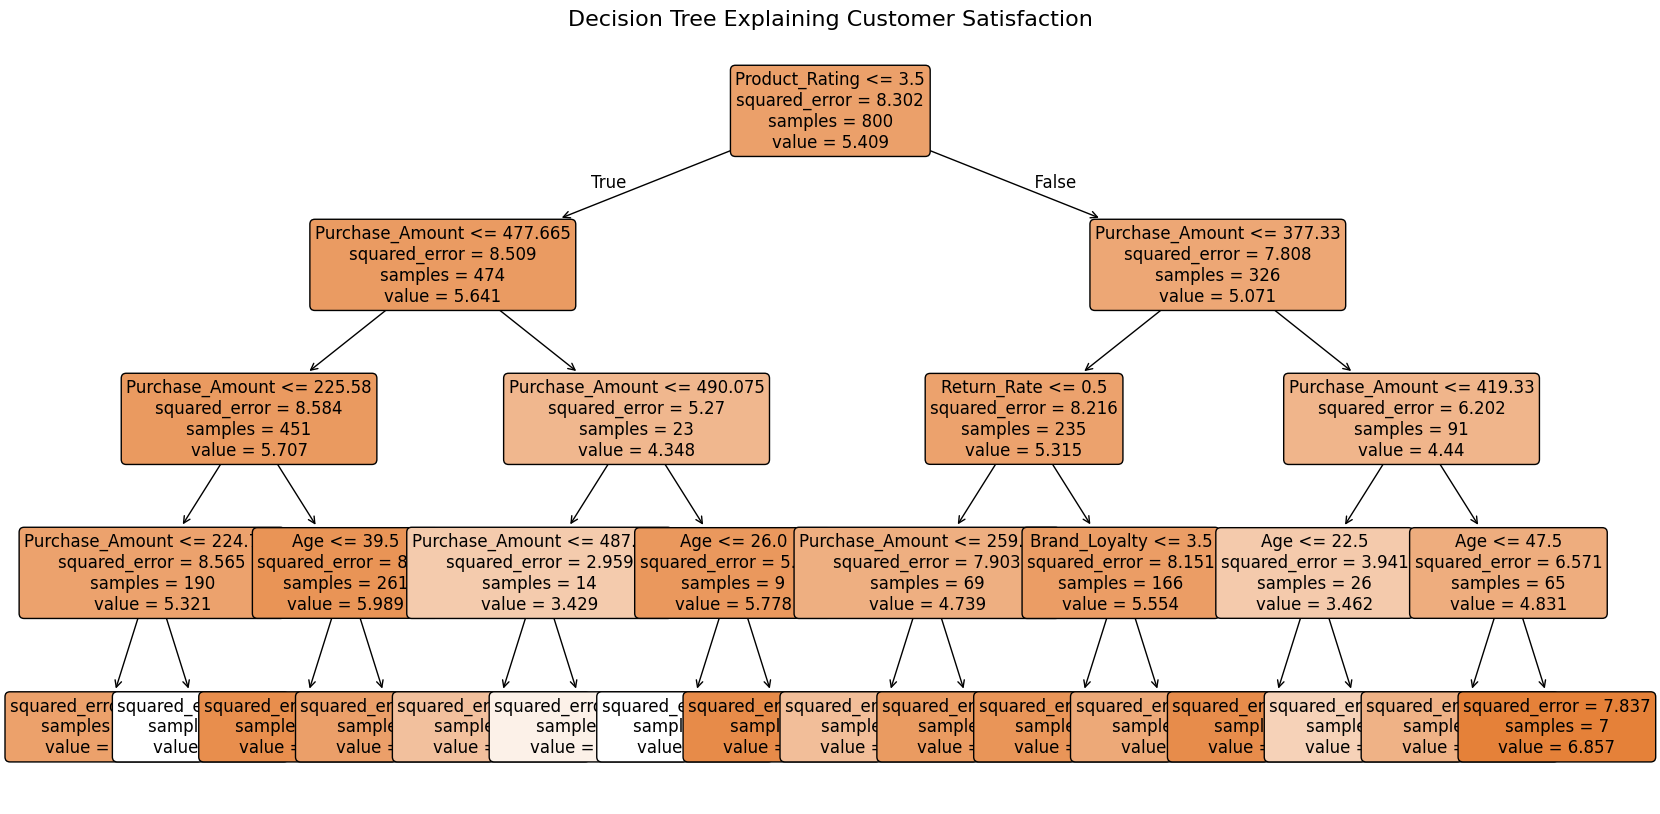

In [53]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model,
    feature_names=features,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Explaining Customer Satisfaction", fontsize=16)
plt.show()

Feature Importance Plot

/tmp/ipython-input-54-2238446697.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


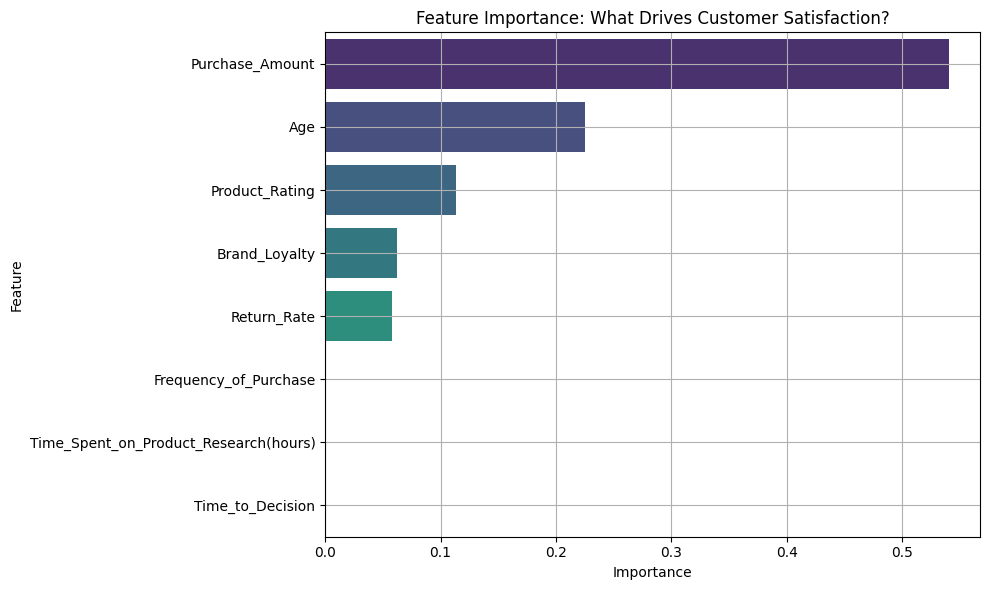

In [54]:
importances = tree_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance: What Drives Customer Satisfaction?")
plt.grid(True)
plt.tight_layout()
plt.show()

# Predictive Analysis

Creating Purchase Level

In [55]:
def classify_purchase_level(amount):
    if amount < 200:
        return "Low"
    elif amount <= 400:
        return "Medium"
    else:
        return "High"

df['Purchase_Level'] = df['Purchase_Amount'].apply(classify_purchase_level)

Features Selection

In [77]:
features = [
    'Age', 'Purchase_Amount', 'Frequency_of_Purchase',
    'Brand_Loyalty', 'Product_Rating', 'Time_Spent_on_Product_Research(hours)',
    'Return_Rate', 'Time_to_Decision'
]

In [78]:
X = df[features]
y = df['Purchase_Level']

In [79]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

Train-Test Split and Model Training

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=5)

In [81]:
clf = RandomForestClassifier(random_state=25)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=25)

In [82]:
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Classification Report:

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        70
         Low       1.00      1.00      1.00       102
      Medium       1.00      1.00      1.00       128

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Confusion Matrix

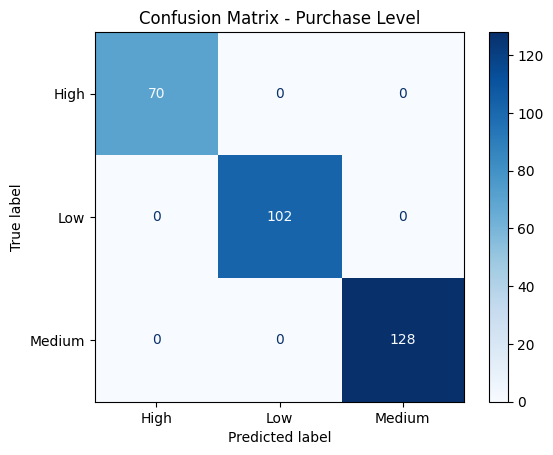

In [85]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=le.classes_, cmap="Blues")
plt.title("Confusion Matrix - Purchase Level")
plt.show()

/tmp/ipython-input-86-1550391081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='magma')


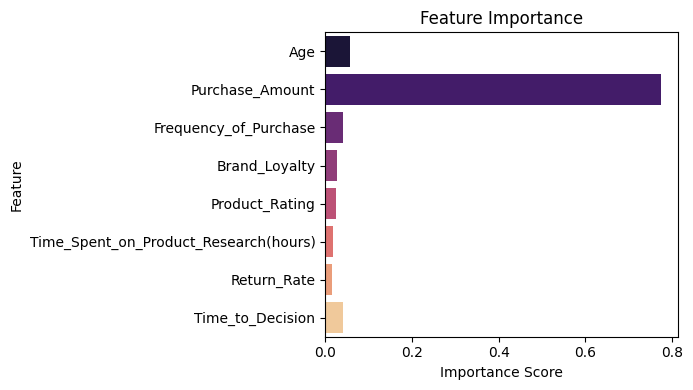

In [86]:
importances = clf.feature_importances_
plt.figure(figsize=(7, 4))
sns.barplot(x=importances, y=features, palette='magma')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [88]:
def recommend_action(purchase_level):
    if purchase_level == "Low":
        return "Offer first-time discount or retarget via ads."
    elif purchase_level == "Medium":
        return "Send loyalty rewards or cross-sell with bundles."
    else:  # High
        return "Promote premium products or VIP membership."

In [89]:
new_customers = df[features].sample(5, random_state=25)
new_preds_encoded = clf.predict(new_customers)
new_preds = le.inverse_transform(new_preds_encoded)

In [90]:
results = new_customers.copy()
results['Predicted_Level'] = new_preds
results['Recommended_Action'] = results['Predicted_Level'].apply(recommend_action)

In [91]:
print("Prescriptive Recommendations:\n")
print(results[['Age', 'Brand_Loyalty', 'Predicted_Level', 'Recommended_Action']])

Prescriptive Recommendations:

     Age  Brand_Loyalty Predicted_Level  \
688   50              5             Low   
49    46              1          Medium   
288   29              5            High   
698   23              4          Medium   
775   33              5             Low   

                                   Recommended_Action  
688    Offer first-time discount or retarget via ads.  
49   Send loyalty rewards or cross-sell with bundles.  
288       Promote premium products or VIP membership.  
698  Send loyalty rewards or cross-sell with bundles.  
775    Offer first-time discount or retarget via ads.  


# Prescriptive Analysis

In [92]:
X_test['Predicted_Satisfaction'] = tree_model.predict(X_test)

In [93]:
#Customers with low satisfaction (<5)
low_satisfaction = X_test[X_test['Predicted_Satisfaction'] < 5].copy()

**Logic:** if Brand_Loyalty < 3, suggest boosting loyalty

In [94]:
low_satisfaction['Recommended_Action'] = low_satisfaction['Brand_Loyalty'].apply(
    lambda x: 'Increase Brand Loyalty' if x < 3 else 'Improve Product Info')

In [96]:
# Show a few results
low_satisfaction[['Predicted_Satisfaction', 'Brand_Loyalty', 'Recommended_Action']].head()

,Predicted_Satisfaction,Brand_Loyalty,Recommended_Action
193,4.586207,2,Increase Brand Loyalty
279,4.586207,4,Improve Product Info
721,4.586207,3,Improve Product Info
979,4.025641,4,Improve Product Info
353,4.586207,1,Increase Brand Loyalty
